<a href="https://colab.research.google.com/github/Mohican999370/Reverie/blob/master/transferlearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Transfer learning and fine tuning the algorithum
#pretrained weights from another model
#are unfrozen and tweaked during to better suit the own data


   # Model 0: a transfer learning model using the Keras Functional API
   # Model 1: a feature extraction transfer learning model on 1% of the data with data augmentation
   # Model 2: a feature extraction transfer learning model on 10% of the data with data augmentation
   # Model 3: a fine-tuned transfer learning model on 10% of the data
    #Model 4: a fine-tuned transfer learning model on 100% of the data


In [2]:
import datetime
print(f' the notebook runtime is at:{datetime.datetime.now()}')

 the notebook runtime is at:2024-03-22 16:46:39.169706


In [ ]:
#check tf version
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
# obtain helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py




--2024-03-22 16:47:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-22 16:47:04 (51.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
### importing the nececssary functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir



In [ ]:
# obatin the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-03-21 19:54:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   157MB/s    in 1.0s    

2024-03-21 19:54:30 (157 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip') # using helper function

In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [ ]:
### train and test data set
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
# 3/1/2024: the image_dataset_directory does rescale, imagedatagenerator cod eis not required.
#since the flow from directory has not rescaled the data., we will try using image data geenratorr on rescaling only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale =1/255)
test_gen = ImageDataGenerator(rescale =1/255)

In [ ]:
train_gen

In [ ]:
train_data_gen= train_gen.flow_from_directory(train_dir,
                                              batch_size =32,
                                              target_size = (224,224),
                                              class_mode = 'categorical')
test_data_gen= train_gen.flow_from_directory(test_dir,
                                              batch_size =32,
                                              target_size = (224,224),
                                              class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
train_data_gen

In [ ]:
# since the imagedatageenrator has been slowwer for larger datatset.
#we will use the image_dataset_from_directory
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode ='categorical',
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32,
                                                                           label_mode ='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# access the data using take method
for images, labels in train_data_10_percent.take(1):
  print(images, labels)


tf.Tensor(
[[[[1.43030609e+02 8.60306168e+01 6.70306168e+01]
   [1.43903061e+02 8.69030609e+01 6.79030609e+01]
   [1.44066330e+02 8.70663300e+01 6.80663300e+01]
   ...
   [2.41633434e+01 6.22450676e+01 1.01729919e+02]
   [2.05612488e+01 6.13469238e+01 1.07367332e+02]
   [2.84439697e+01 6.20867920e+01 1.06831665e+02]]

  [[1.44948975e+02 8.79489822e+01 6.89489822e+01]
   [1.44867340e+02 8.78673477e+01 6.88673477e+01]
   [1.43943878e+02 8.69438782e+01 6.79438782e+01]
   ...
   [4.02705612e+01 7.56124878e+01 1.21770805e+02]
   [5.48775711e+01 9.18724594e+01 1.43663269e+02]
   [4.28465385e+01 7.55352783e+01 1.26295479e+02]]

  [[1.41867340e+02 8.58673477e+01 6.88673477e+01]
   [1.43413269e+02 8.74132690e+01 7.04132690e+01]
   [1.42448975e+02 8.64489746e+01 6.94489746e+01]
   ...
   [2.58776512e+01 5.69746590e+01 1.05847237e+02]
   [3.05457687e+01 6.31171989e+01 1.17117195e+02]
   [1.96328125e+01 5.06328125e+01 1.05418526e+02]]

  ...

  [[6.68722076e+01 2.93060036e+01 1.77193375e+01]
   [7

Model 0 : Functional API

In [ ]:
#Model 0
### Building a transfer learning model using functional Api

# Series of steps

#1. Instansiate the model, by choosing the target model suxh as Efficent NetV280
# setting include_top parameter to false, so we can our own ouput model
#2 set the base model trainable to False to freeze all the weights in the pretrained model

In [ ]:
#we can observe that the images are not naturalized, and the labels are dummy variables.

In [ ]:
### create base model with tf.keras.applications

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
# include_top = false means we are creating our own outplut layer



base_model.trainable = False # so the trined info stays intact.

inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')


x= base_model(inputs)
print(f"Shape after base_model: {x.shape}")

#average pool the output of the base model
x= tf.keras.layers.GlobalAveragePooling2D(name = "global_average_polling")(x)
print(f'After global average polling 2d():{x.shape}')

outputs = tf.keras.layers.Dense(10, activation ='softmax', name = 'output_layer')(x)


model_0 = tf.keras.Model(inputs,outputs)


model_0.compile(loss = 'categorical_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs =5,
                                 steps_per_epoch =len(train_data_10_percent),
                                 validation_data = test_data_10_percent,

                                 validation_steps =len(test_data_10_percent),
                                 callbacks = [create_tensorboard_callback('transfer_learning',"10 _percent_feature")])

Shape after base_model: (None, 7, 7, 1280)
After global average polling 2d():(None, 1280)
Saving TensorBoard log files to: transfer_learning/10 _percent_feature/20240321-195451
Epoch 1/5
24/24 [==============================] - 194s 8s/step - loss: 1.8809 - accuracy: 0.4093 - val_loss: 1.3153 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 179s 8s/step - loss: 1.1296 - accuracy: 0.7533 - val_loss: 0.8903 - val_accuracy: 0.8116
Epoch 3/5
24/24 [==============================] - 158s 7s/step - loss: 0.8296 - accuracy: 0.8133 - val_loss: 0.7182 - val_accuracy: 0.8336
Epoch 4/5
24/24 [==============================] - 182s 8s/step - loss: 0.6875 - accuracy: 0.8440 - val_loss: 0.6238 - val_accuracy: 0.8484
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.5910 - accuracy: 0.8667

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

1% data on food class.

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
#unzip_data("10_food_classes_1_percent.zip")


In [ ]:
def unzip_data1( dir_name):
  import zipfile
  zipref = zipfile.ZipFile(dir_name)
  zipref.extractall()
  zipref.close()

unzip_data1('10_food_classes_1_percent.zip')

In [ ]:
unzip_data1('10_food_classes_1_percent.zip')

In [ ]:
train_dir = '10_food_classes_1_percent/train'
test_dir ='10_food_classes_1_percent/test'

# now, get the image in the format we work on from image_dataset_from_directory



In [ ]:
import os
for dir_path,dir_name, file_name in os.walk('10_food_classes_1_percent'):
  print(f' there are {len(dir_name)} directories  with {len(file_name)} images, of dir length {dir_path}')

In [ ]:
# train_dir
# preprocessing of the dataset
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
train_1_percent = image_dataset_from_directory(train_dir,

                                               batch_size =32,
                                               image_size = (224,224),
                                               label_mode = 'categorical',  # since it has multiplt output images of food
                                               seed = 42)

test_1_percent = image_dataset_from_directory(test_dir,
                                              batch_size =32,
                                              image_size = (224,224),
                                              label_mode = 'categorical',
                                              seed =42)

In [ ]:
# data_agumentation
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#from tensorflow.keras.layers import Sequential

augumentation = tf.keras.Sequential([
                        preprocessing.RandomRotation(0.2),
                        preprocessing.RandomFlip('horizontal'),
                        preprocessing.RandomZoom(0.2),
                        preprocessing.RandomHeight(0.2),
                      preprocessing.RandomWidth(0.2)
], name = 'augumentation') # layers.rescaling while using resnet50V2

In [ ]:
train_1_percent.class_names

In [ ]:
# random photo, and obtain it with the directory


import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

target_class = random.choice(train_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class

random_image = random.choice(os.listdir(target_dir))

random_path = target_dir + "/"+ random_image

# read the image
img = mpimg.imread(random_path)

plt.imshow(img)
plt.title(f"the random image from the directory with class {target_class}")
plt.axis(False)
# random_image





In [ ]:
# obtaining random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np

target_class = random.choice(train_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class

rand_image = random.choice(os.listdir(target_dir))

rand_image_path = target_dir  + "/" + rand_image

img = mpimg.imread(rand_image_path)
print(img.shape)
plt.imshow(img)
plt.title(f" original random image  from class: {target_class}")
plt.axis(False);
#augumenting the image
import tensorflow as tf

augumented_image = augumentation(tf.expand_dims(img,axis = 0))
print(augumented_image.shape)
plt.figure()
plt.imshow(tf.squeeze(augumented_image)/255)
plt.title(f"the augumented image of the class : {target_class}")
plt.axis(False);



In [ ]:
inputs.shape
x.shape

In [ ]:
x =augumentation(inputs)

x.shape

In [ ]:
#base_model2(x)

In [ ]:
#train_1_percent
test_1_percent
outputs, inputs

In [ ]:
base_model2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top =False)
base_model2.trainable = False  # make the input layer just as it was trained by efficient net, to get their best info.
input_shape = (224,224,3)
inputs = tf.keras.layers.Input(shape =(224,224,3), name = 'input_layer')

x= augumentation(inputs)
# adding augumentation in the function api layer rather then


x= base_model2(inputs, training =False)


x = tf.keras.layers.GlobalAveragePooling2D(name = "globalaveragepool")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layer")(x)

model2 = tf.keras.Model(inputs,outputs)

model2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_2 = model2.fit(train_1_percent,
                       epochs = 10,
                       steps_per_epoch = len(train_1_percent),
                       validation_data = test_1_percent,
                       validation_steps = int(0.25*len(test_1_percent)),
                       callbacks = [create_tensorboard_callback('transfer_learning',"1_percent_data")])

In [ ]:
#test_data_gen.dtype, train.dtype
# plotting the curve of loss and accuracy
import pandas as pd
mod2 = pd.DataFrame(history_2.history).plot(figsize = (10,7))


In [ ]:
model2.summary()

# working on the dataset with tuning using elastinet for 10% data and dataaugumentation

In [ ]:
### creating a augumented layer in 10% test data
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
import os
walk_through_dir("10_food_classes_10_percent") # using built in helper function

In [ ]:
train_data = '10_food_classes_10_percent/train'
test_data = '10_food_classes_10_percent/test'

In [ ]:
# create the augumented layer

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

augumented_layer = keras.Sequential([
    layers.RandomFlip('vertical'),
    layers.RandomZoom(0.4),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.3)
],name = 'augumentation_layer')


In [ ]:
# image prcossing the data image
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_10_data = image_dataset_from_directory(train_data,
                                             image_size = (224,224),
                                             label_mode ='categorical',
                                             batch_size = 32,
                                             seed = 42)
test_10_data = image_dataset_from_directory(test_data,
                                             image_size = (224,224),
                                             label_mode ='categorical',
                                             batch_size = 32,
                                             seed = 42)


In [ ]:
# after perfomring augumentation and image processing , we can sue the functional api to build the model
import tensorflow

base_model3 = tensorflow.keras.applications.efficientnet_v2.EfficientNetV2B1(include_top = False)
# using the same model here
base_model3.trainable = False
input_shape = (224,224,3)


inputs = layers.Input(shape = input_shape, name = 'input_layer')

x= augumented_layer(inputs) # adding the augumentation layer
x= base_model3(x)

x= tensorflow.keras.layers.GlobalAveragePooling2D(name = 'Golbal_average_pooling')(x)

outputs = tensorflow.keras.layers.Dense(10, activation = 'softmax') (x)

model3 = tensorflow.keras.Model(inputs, outputs)

model3.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics =['accuracy'])

history_3 = model3.fit(train_10_data,
                       epochs = 10,
                       steps_per_epoch = len(train_10_data),
                       validation_data = test_10_data,
                       validation_steps = int(0.25*(len(test_10_data))),
                       callbacks = [create_tensorboard_callback('10_percent', "feature_extraction")])

Saving TensorBoard log files to: 10_percent/feature_extraction/20240321-202118
Epoch 1/10
24/24 [==============================] - 112s 4s/step - loss: 2.1076 - accuracy: 0.2587 - val_loss: 1.5776 - val_accuracy: 0.5905
Epoch 2/10
24/24 [==============================] - 96s 4s/step - loss: 1.5062 - accuracy: 0.6000 - val_loss: 1.1665 - val_accuracy: 0.7237
Epoch 3/10
24/24 [==============================] - 95s 4s/step - loss: 1.2088 - accuracy: 0.6960 - val_loss: 0.8767 - val_accuracy: 0.7911
Epoch 4/10
24/24 [==============================] - 98s 4s/step - loss: 1.0816 - accuracy: 0.6947 - val_loss: 0.7864 - val_accuracy: 0.8010
Epoch 5/10
24/24 [==============================] - 93s 4s/step - loss: 0.9353 - accuracy: 0.7573 - val_loss: 0.7004 - val_accuracy: 0.8191
Epoch 6/10
24/24 [==============================] - 97s 4s/step - loss: 0.8745 - accuracy: 0.7533 - val_loss: 0.6412 - val_accuracy: 0.8273
Epoch 7/10
24/24 [==============================] - 93s 4s/step - loss: 0.8105 -

In [ ]:
# creating a function to use the
def create_base_model(input_shape : tuple[int,int,int] = (224,224,3),
                      output_shape: int = 10,
                      learning_rate : float = 0.0001,
                      training: bool = False)-> tf.keras.Model:

# import the libraries
    import tensorflow as tf
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation
    from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.losses import categorical_crossentropy



    base_model =  EfficientNetV2B0(include_top = False)
    base_model.trainable = training

    # augumentation layer

    augumentation_1 = Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomZoom(0.4),
        layers.RandomHeight(0.3),
        layers.RandomRotation(0.3),
    ], name = "augumentation_layer")
    inputs = tensorflow.keras.Input(shape= input_shape, name = "input_layer")

    x= augumentation_1(inputs)
    x= base_model(x, training = False)

    x= tensorflow.keras.layers.GlobalAveragePooling2D()(x)

    outputs= tensorflow.keras.layers.Dense(units = output_shape, activation = 'softmax', name = "output_layer")(x)

    model = tensorflow.keras.Model(inputs,outputs)

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                  metrics= ['accuracy'])

    return model


In [ ]:
model3= create_base_model()


In [ ]:
def create_tensorboard_callback(dir_name,experiment_name):
    import datetime

    log_dir = dir_name + "/"+ experiment_name + "/" +datetime.datetime.now().strftime("%Y%M%D- %H%M%S")
    tensor_board_callback  = tensorflow.keras.callbacks.TensorBoard(log_dir= log_dir)

    print(f'saving tensordboard callback log files to {log_dir}')
    return tensor_board_callback



In [ ]:
#### creating checkpoint, to be added in the model at callbacks

checkpoint_path = "ten_percent_model_checkpoint_weight/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weight_only= True,
                                                         save_best_only= True,
                                                         save_freq ='epoch',
                                                         verbose =1)

In [ ]:
# we will use the above model into using checkpoi
# we will use the above model into using checkpoi
intial_epochs = 5

history_10_percent_data_aug = model3.fit(train_10_data,
                                         epochs = 5,
                                         validation_data = test_10_data,
                                         validation_steps = int(0.25*len(test_10_data)),
                                                                callbacks = [create_tensorboard_callback('train_10_percent_augumented',"augumented"),checkpoint_callback])

saving tensordboard callback log files to train_10_percent_augumented/augumented/20244003/21/24- 204005
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.3916 - accuracy: 0.1173
Epoch 1: val_loss improved from inf to 2.25877, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 136s 5s/step - loss: 2.3916 - accuracy: 0.1173 - val_loss: 2.2588 - val_accuracy: 0.1743
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 2.2798 - accuracy: 0.1547
Epoch 2: val_loss improved from 2.25877 to 2.15070, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 110s 5s/step - loss: 2.2798 - accuracy: 0.1547 - val_loss: 2.1507 - val_accuracy: 0.2303
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 2.1816 - accuracy: 0.2253
Epoch 3: val_loss improved from 2.15070 to 2.06022, saving model to ten_percent_model_checkpoint_weight/checkpoint.ckpt
2

In [ ]:
# evaluate the test result

result_2 = model3.evaluate(test_10_data)

79/79 [==============================] - 116s 1s/step - loss: 1.8976 - accuracy: 0.4688


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
#plot_loss_curve(history_10_percent_data_aug)

--2024-03-21 20:52:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-21 20:52:54 (45.1 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



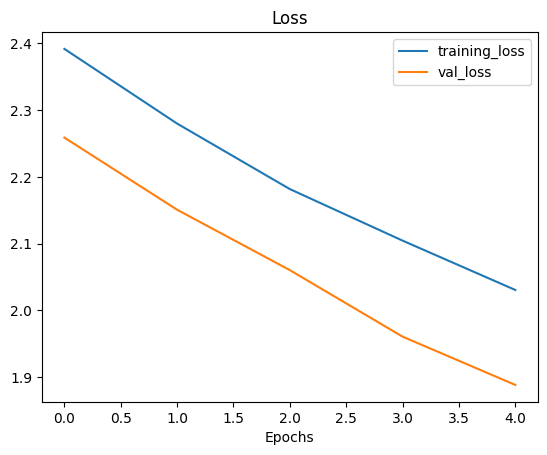

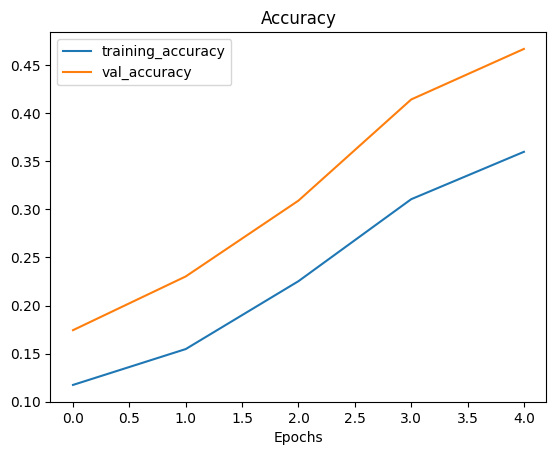

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
# observing the saved model and their weight using the checkpoint
model3.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results =model3.evaluate(test_10_data)

79/79 [==============================] - 117s 1s/step - loss: 1.8976 - accuracy: 0.4688


In [ ]:
#### compainring the loaded model and previous model
## the storing of data might have caused them to have different results

result_2 == loaded_weights_model_results

False

In [ ]:
import numpy as np
np.isclose(np.array(result_2),np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
### the difference between the results
print(np.array(result_2)- np.array(loaded_weights_model_results))

[-3.57627869e-07  0.00000000e+00]


# Fine tuning

In [ ]:
# performing fine tuning on the output layers, the base or the the input layer stays frozen.
model3.layers


In [ ]:
for layer_number, layer in enumerate(model3.layers):
  print(f'layer number:{layer_number } | layer name : {layer.name} | layer type : {layer} | trainable {layer.trainable}')

layer number:0 | layer name : input_layer | layer type : <keras.src.engine.input_layer.InputLayer object at 0x7c946ae3bac0> | trainable True
layer number:1 | layer name : augumentation_layer | layer type : <keras.src.engine.sequential.Sequential object at 0x7c946ae3b700> | trainable True
layer number:2 | layer name : efficientnetv2-b0 | layer type : <keras.src.engine.functional.Functional object at 0x7c9470fa4fa0> | trainable False
layer number:3 | layer name : global_average_pooling2d_1 | layer type : <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7c94693d6fb0> | trainable True
layer number:4 | layer name : output_layer | layer type : <keras.src.layers.core.dense.Dense object at 0x7c946ae39780> | trainable True


In [ ]:
model3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augumentation_layer (Seque  (None, None, 224, 3)      0         
 ntial)                                                          
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
model3_base_model = model3.layers[2]
model3_base_model.name # accessing the layers

model3.layers[3]

In [ ]:
print(len(model3_base_model.trainable_variables))
###check on how many layers were trained in the base model

0


In [ ]:
for layer_number, layer in enumerate(model3_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
#### unfreezing the 10 base layers.
model3_base_model.trainable = True

for layer in model3.base_model.ayers[:-10]:
  layer.trainable = False  # freeze all the layers except the last 10




AttributeError: 'Functional' object has no attribute 'base_model'

In [ ]:
# the base model layer has been trainable and evrything else is not trainable
